In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [19]:
def System(r,t,decayA,decayB):
    NA, NB, N = r

    dNAdt = -decayA*NA
    dNBdt = decayA*NA - decayB*NB
    dNdt = decayB*NB
    
    return np.array([dNAdt, dNBdt, dNdt])

In [27]:
t = np.linspace(0,10,50)
r0 =  np.array([500, 0, 0])

In [29]:
sol = odeint(System, r0, t, args=(0.5,0.3))
NA = sol[:,0]
NB = sol[:,1]
NC = sol[:,2]

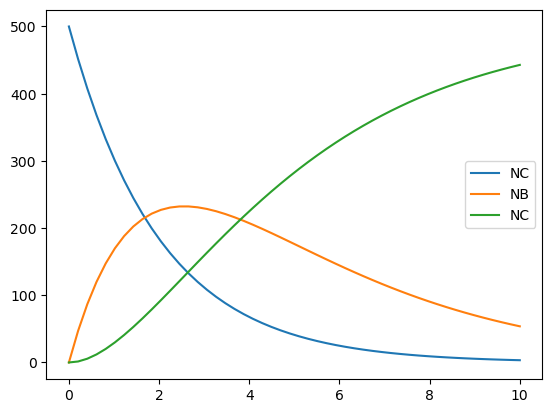

In [33]:
plt.plot(t,NA,label="NC")
plt.plot(t,NB,label="NB")
plt.plot(t,NC,label="NC")
plt.legend()

In [34]:
def Increment(f,r,t,h):
    
    state1 = np.array([r[0],r[1]])
    K1 = f(state1,t)
    
    state2 = np.array([r[0]+0.5*h*K1[0],r[1]+0.5*h*K1[1]])
    K2 = f(state2,t+0.5*h)
    
    state3 = np.array([r[0]+0.5*h*K2[0],r[1]+0.5*h*K2[1]])
    K3 = f(state3,t+0.5*h)
    
    state4 = np.array([r[0]+h*K3[0],r[1]+h*K3[1]])
    K4 = f(state4, t+h)
    
    Deltaf = h*(K1+2*K2+2*K3+K4)/6
    
    return r+Deltaf

In [ ]:
def Adaptativo(f,r0,t,e=1e-4):
    #Calcule $h$, $t_{0}$, $t_{f}$.
    
    h = t[1] - t[0]
    
    #Defina los vectores de tiempo y de solución del sistema.
    
    Time = np.array([t])
    Vector = r
    
    while t < tf:
    # Avance h desde el punto actual
        r1 = Increment(f,r,t,h)
    # Avance h desde el siguiente punto
        r2 = Increment(f,r1,t+h,h)
        
    # Avance 2h desde el punto actual
        rt = Increment(f,r,t,2*h)
        
    # El error es comparar los avances
    #->h->h y ->2h en sus componentes
        error = np.linalg.norm( r2 - rt )
        
    # Si el error es menor que la tolerancia (e) -> avanzo 2h
        if error < e:
            t += 2h
            r = rt
    # Llene vectores
    
        Time = np.append(Time,t)
        Vector = np.vstack((Vector,r))
    
    # Si el error es muy grande, cambie el paso
    # Seg´un Fehlberg
        
        if error > e:
            
            q = 0.85 (e/error)^{1/4}
            h = h*q
        
    return TimeVector, Vectors


